In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

## i create a dummy signal  

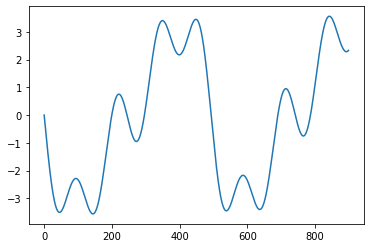

In [2]:
t=np.arange(10000)
omega=2*3.14*2
a=0.1*np.sin(omega*t)
a1=np.sin(omega*t)
b=3*np.sin(2*omega*t)
b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
d=5*np.sin(8*omega*t)
d1=np.sin(8*omega*t)
e=a+b+c+d/4
plt.plot(e[0:900])
z=np.random.uniform(-0.5,0.5,900).reshape(1,900)


In [3]:
m=e[0:900]+z
m.reshape(1,-1)

array([[-1.06986576e-01, -1.23463845e-01, -2.72006782e-01,
        -1.85112179e-02, -1.87958328e-02, -9.68195174e-01,
        -3.59596567e-01, -8.92766177e-01, -7.94886326e-01,
        -1.09640588e+00, -9.42660439e-01, -1.42789416e+00,
        -1.65230753e+00, -1.88542484e+00, -1.79915932e+00,
        -1.32765312e+00, -1.78854568e+00, -2.51887702e+00,
        -1.82380504e+00, -2.22257883e+00, -2.60723219e+00,
        -2.34752065e+00, -2.05294952e+00, -2.98853999e+00,
        -3.07803843e+00, -2.37065465e+00, -2.87458400e+00,
        -2.81225004e+00, -2.58334155e+00, -3.39638283e+00,
        -2.99022039e+00, -2.70287886e+00, -3.14394997e+00,
        -3.46602387e+00, -3.19526851e+00, -3.29598609e+00,
        -2.97392178e+00, -3.63667232e+00, -3.11633311e+00,
        -3.07903780e+00, -3.41968712e+00, -3.94456915e+00,
        -3.66906345e+00, -3.14322386e+00, -3.57148525e+00,
        -3.38018142e+00, -3.84873329e+00, -3.38558302e+00,
        -3.00671740e+00, -3.27541494e+00, -3.86430901e+0

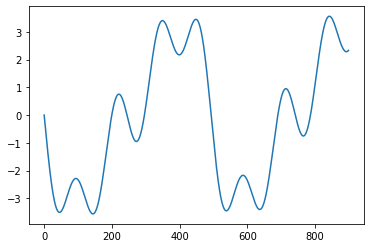

In [4]:

plt.plot(e[0:900])
plt.show()

In [5]:
kk=pd.DataFrame()


In [6]:
kk['a']=a1[0:900]
kk['b']=b1[0:900]
kk['c']=c[0:900]
kk['d']=d1[0:900]
kk['sigint']=m[0:900].reshape(-1,1)

In [7]:
kk.head()

,a,b,c,d,sigint
0,0.000000,0.000000,0.000000,0.000000,-0.106987
1,-0.006371,-0.012741,-0.025480,-0.050943,-0.123464
2,-0.012741,-0.025480,-0.050943,-0.101753,-0.272007
3,-0.019111,-0.038214,-0.076373,-0.152300,-0.018511
4,-0.025480,-0.050943,-0.101753,-0.202451,-0.018796


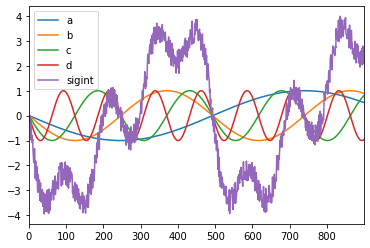

In [8]:
kk.plot()

In [11]:
from sklearn.linear_model import LinearRegression
X=kk[["a","b","c","d"]]
y=kk["sigint"]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9851571902940124

In [12]:
pred=reg.predict(X)

In [13]:
kk["Predicted"]=pred

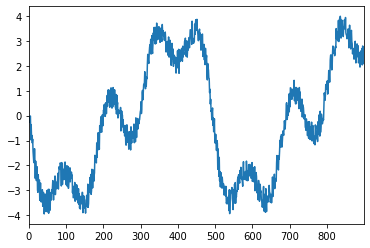

In [14]:
kk["sigint"].plot()

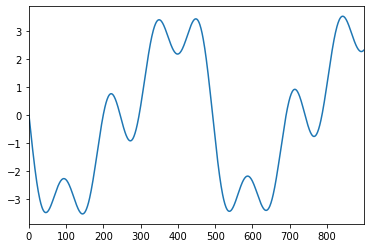

In [15]:
kk["Predicted"].plot()

In [16]:
reg.coef_

array([0.07949414, 2.99407965, 0.99491553, 1.24147157])

___What i am trying to do is create a general formula for a sound signal of an instrument for its one note by using collection of sin wave harmonics___
What i have done:
* created a signal using different amplitudes for sinwaves whose frequecies increase in by 2 every time 
* i have used f 2f 4f and 8f sinwaves with varrying amplitude to generate a wave. I add them and divide resultant vector by 4
* Then i add noise to the resultant wave
* so this somehow represents how a real world arbitary sound wave would look

* now i take a table with vectors of each frequency of sinwave 
* i append the input wave to this 

* Apply least squares linear regression to this to calculate the weights

Observations till  now :

* we get a good waveform which is similar to the input waveform

## Most Important Observation here is that the we obtain a general formula for the input noisy wave and can now generate a wave which is perfect with no noise

In [17]:
import scipy.io.wavfile
a,wave=scipy.io.wavfile.read('flute1.wav', mmap=False)
b=44100/1008
b

43.75

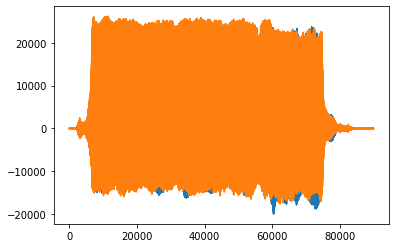

In [18]:
plt.plot(wave)

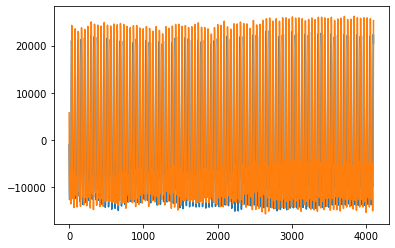

In [19]:
plt.plot(wave[7500:11600])

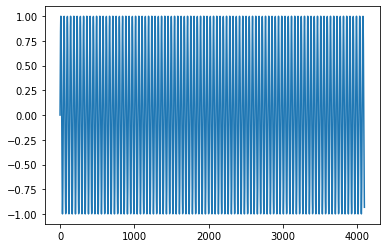

In [20]:
t=np.arange(4100)
omega=2*np.pi/43.75
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(8*omega*t)
e=np.sin(16*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(4*omega*t)
i=np.cos(8*omega*t)
j=np.cos(16*omega*t)
a1=np.sin(32*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(64*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(128*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(32*omega*t)
g1=np.cos(64*omega*t)
h1=np.cos(128*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
n=np.random.uniform(-1,1,4100).reshape(1,4100)

plt.plot(a)


In [21]:
sins=pd.DataFrame()

In [22]:
sins["a"]=a
sins["b"]=b
sins["c"]=c
sins["d"]=d
sins["e"]=e
sins["f"]=f
sins["g"]=g
sins["h"]=h
sins["i"]=i
sins["j"]=j
sins["a1"]=a1
sins["b1"]=b1
sins["c1"]=c1
sins["d1"]=d1
sins["e1"]=e1
sins["f1"]=f1
sins["g1"]=g1
sins["h1"]=h1
sins["i1"]=i1
sins["j1"]=j1
sins["n"]=n.reshape(-1,1)

# sins["signal"]=
signal=wave[7500:11600]
sig = np.array(signal[:, 0]).reshape(-1, 1)
print(sig.shape)
sig=sig

sins["sign"]=sig

(4100, 1)


In [23]:
sins.head()

,a,b,c,d,e,f,g,h,i,j,...,c1,d1,e1,f1,g1,h1,i1,j1,n,sign
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.742886,-981
1,0.143122,0.283298,0.543384,0.912324,0.747136,0.989705,0.959032,0.839484,0.409468,-0.664672,...,-0.449987,0.961536,0.990950,-0.116423,-0.972891,0.893035,0.274679,0.134233,-0.470782,-4611
2,0.283298,0.543384,0.912324,0.747136,-0.993200,0.959032,0.839484,0.409468,-0.664672,-0.116423,...,-0.803709,0.528227,0.266037,-0.972891,0.893035,0.595023,-0.849103,-0.963963,0.322753,-7761
3,0.417641,0.758947,0.988380,-0.300468,0.573168,0.908612,0.651153,-0.152000,-0.953792,0.819438,...,-0.985493,-0.671351,-0.919528,0.342957,-0.764761,0.169718,-0.741139,-0.393025,-0.234882,-10268
4,0.543384,0.912324,0.747136,-0.993200,0.231263,0.839484,0.409468,-0.664672,-0.116423,-0.972891,...,-0.956450,-0.897038,-0.512899,0.893035,0.595023,-0.291895,0.441953,0.858449,-0.462871,-11933


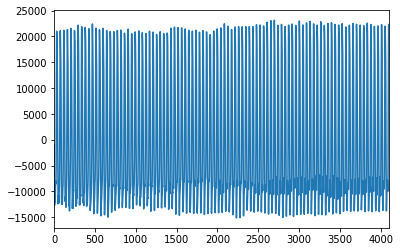

In [24]:
sins["sign"].plot()

In [27]:
from sklearn.linear_model import LinearRegression
X=sins[["a","b","c","d","e","f","g","h","i","j","a1","b1","c1","d1","e1","f1","g1","h1","i1","j1","n"]]
y=sins[["sign"]]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.91519070581099

In [28]:
pred=reg.predict(X)

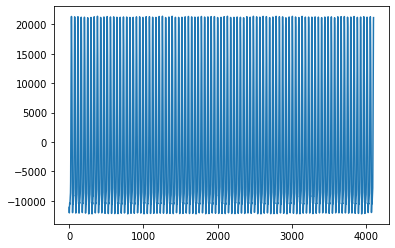

In [29]:
plt.plot(pred)

In [30]:
reg.coef_

array([[-1.52527474e+04,  2.37420405e+03,  3.93090615e+02,
        -1.37125683e+00,  6.95129991e-03, -4.40511704e+03,
        -5.77145605e+03, -8.95244137e+02,  1.21748998e+01,
         2.59164574e+00, -2.96127968e+00, -2.25719632e-01,
        -3.47680678e+01, -1.88428124e+00,  1.71997470e+00,
         1.61843337e+00,  4.26634885e+00,  6.99651060e+00,
         4.11166909e+00, -1.71513227e+00,  9.77182637e+01]])

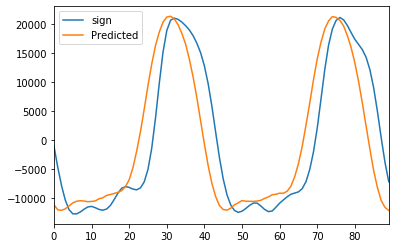

In [31]:
sins["Predicted"]=pred
sins[["sign","Predicted"]][0:90].plot()

In [32]:
a=sins["Predicted"]

In [33]:
zz=44100*3/4100

In [34]:
sigout=np.array(a)
signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout=np.append(sigout,a)
    signalorig=np.append(signalorig,np.array(sins["sign"]))

In [35]:
sigout

array([-11115.46922001, -11966.98001539, -12056.2192848 , ...,
        19109.45247087,  20527.6175243 ,  21148.9526411 ])

In [36]:
scaledsig = np.int16(sigout/np.max(np.abs(sigout)) * 32767)
scipy.io.wavfile.write("FluteReproduced.wav", 44100, scaledsig)
scipy.io.wavfile.write("Flute.wav", 44100, signalorig)


In [37]:
cof=reg.coef_

In [38]:
t=np.arange(4100)
omega=2*np.pi/100.22
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(3*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(4*omega*t)
e=np.sin(5*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(3*omega*t)
i=np.cos(4*omega*t)
j=np.cos(5*omega*t)
a1=np.sin(6*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(7*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(8*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(6*omega*t)
g1=np.cos(7*omega*t)
h1=np.cos(8*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
sins2=pd.DataFrame()
sins2["a"]=a
sins2["b"]=b
sins2["c"]=c
sins2["d"]=d
sins2["e"]=e
sins2["f"]=f
sins2["g"]=g
sins2["h"]=h
sins2["i"]=i
sins2["j"]=j
sins2["a1"]=a1
sins2["b1"]=b1
sins2["c1"]=c1
sins2["d1"]=d1
sins2["e1"]=e1
sins2["f1"]=f1
sins2["g1"]=g1
sins2["h1"]=h1
sins2["i1"]=i1
sins2["j1"]=j1
sins2["n"]=n.reshape(-1,1)
fsign=sins2*cof
z=fsign.sum(axis = 1, skipna = True) 
z.shape


(4100,)

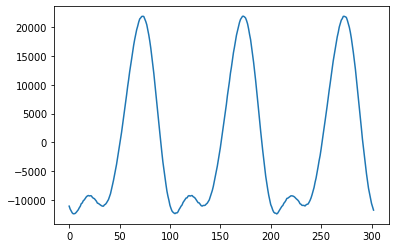

In [39]:
sigout1=np.array(z)
# signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout1=np.append(sigout1,z)
#     signalorig=np.append(signalorig,np.array(sins["sign"]))
plt.plot(z[0:303])
scaledsig1 = np.int16(sigout1/np.max(np.abs(sigout1)) * 32767)
scipy.io.wavfile.write("Flute440.wav", 44100, scaledsig1)


In [46]:
def freq_calc(sig):
    rep=0
    for i in range(len(sig)-1):
        if sig[i+1]>=0 and sig[i]<=0:
            rep+=1
    return len(sig)/rep

freq_calc(sig)    
44100/43.61

1011.2359550561798

In [48]:
44100/1008

43.75

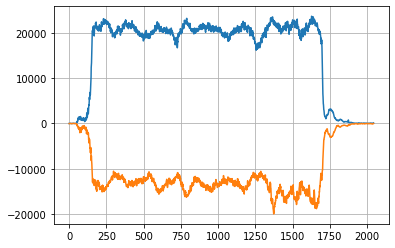

In [54]:
signal=wave
sig = np.array(signal[:, 0]).reshape(-1, 1)
def envelope_calc(sig):
    max_val=[]
    min_val=[]
    for i in range(0,len(sig),44):
        max_val.append(max(sig[i:i+43]))
        min_val.append(min(sig[i:i+43]))
    return max_val,min_val
env1,env2=envelope_calc(sig)
plt.plot(env1)
plt.plot(env2)
plt.grid()